In [112]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import category_encoders as ce
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

In [2]:
def train_validation_test_split(
    X, y, train_size = 0.8, val_size = 0.1, test_size = 0.1, 
    random_state = None, shuffle = True):
        
    assert train_size + val_size + test_size == 1
    
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X, y, test_size=test_size, random_state = random_state, shuffle = shuffle)
    
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val, test_size = val_size/(train_size + val_size), 
        random_state = random_state, shuffle = shuffle)
    
    return X_train, X_val, X_test, y_train, y_val, y_test

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        48
           1       0.93      0.96      0.94        52

   micro avg       0.94      0.94      0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100

accuracy 0.94


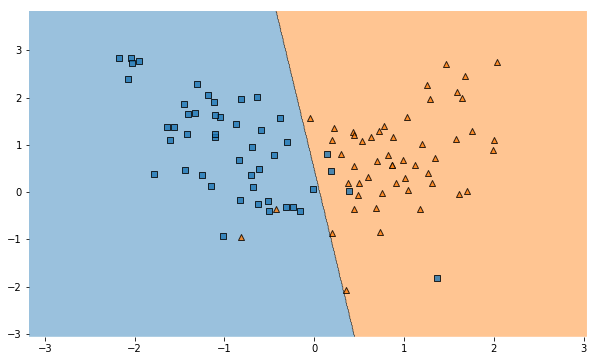

In [3]:
#1. Generate data

# Try re-running the cell with different values for these parameters
n_samples = 1000
weights = (0.50, 0.50)
class_sep = 0.8

X, y = make_classification(n_samples=n_samples, n_features=2, n_informative=2, 
                           n_redundant=0, n_repeated=0, n_classes=2, 
                           n_clusters_per_class=1, weights=weights, 
                           class_sep=class_sep, random_state=0)


# 2. Split data

# Uses our custom train_validation_test_split function
X_train, X_val, X_test, y_train, y_val, y_test = train_validation_test_split(
    X, y, train_size=0.8, val_size=0.1, test_size=0.1, random_state=1)


# 3. Fit model

# Try re-running the cell with different values for this parameter
class_weight = None

model = LogisticRegression(solver='lbfgs', class_weight=class_weight)
model.fit(X_train, y_train)


# 4. Evaluate model

y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))
print('accuracy', accuracy_score(y_val, y_pred))


# 5. Visualize decision regions

plt.figure(figsize=(10, 6))
plot_decision_regions(X_val, y_val, model, legend=0);

In [4]:
pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])

,Feature 1,Feature 2
0,-0.200228,-1.126880
1,0.876102,0.980291
2,-0.722953,0.106167
3,0.697991,2.207370
4,1.306738,2.383626
5,2.031103,1.805274
6,1.175666,-0.057929
7,-0.534573,-0.764794
8,-0.791462,0.799571
9,-1.000704,1.285977


In [48]:
# read data file
arrests = pd.read_csv('Arrests.csv')

arrests.head()

,Unnamed: 0,released,colour,year,age,sex,employed,citizen,checks
0,1,Yes,White,2002,21,Male,Yes,Yes,3
1,2,No,Black,1999,17,Male,Yes,Yes,3
2,3,Yes,White,2000,24,Male,Yes,Yes,3
3,4,No,Black,2000,46,Male,Yes,Yes,1
4,5,Yes,Black,1999,27,Female,Yes,Yes,1


In [49]:
arrests = arrests.drop(['Unnamed: 0'], axis = 1)
arrests = arrests.drop(['citizen'], axis = 1)
arrests.head()

,released,colour,year,age,sex,employed,checks
0,Yes,White,2002,21,Male,Yes,3
1,No,Black,1999,17,Male,Yes,3
2,Yes,White,2000,24,Male,Yes,3
3,No,Black,2000,46,Male,Yes,1
4,Yes,Black,1999,27,Female,Yes,1


In [50]:
arrests['released'] = arrests['released'].replace({'Yes': 1, 'No': 0})
arrests.head()

,released,colour,year,age,sex,employed,checks
0,1,White,2002,21,Male,Yes,3
1,0,Black,1999,17,Male,Yes,3
2,1,White,2000,24,Male,Yes,3
3,0,Black,2000,46,Male,Yes,1
4,1,Black,1999,27,Female,Yes,1


In [60]:
arrests.dtypes

released     int64
colour      object
year         int64
age          int64
sex         object
employed    object
checks       int64
dtype: object

In [51]:
predicted = [arrests.released.mean()] * len(arrests)
mean_absolute_error(arrests.released, predicted)

0.28310330944119527

In [71]:
X = arrests.drop(columns = 'released')
y = arrests['released'] == 1

In [72]:
# split data into train, validation, and test data
# Uses custom train_validation_test_split function
X_train, X_val, X_test, y_train, y_val, y_test = train_validation_test_split(
    X, y, train_size = 0.8, val_size = 0.1, test_size = 0.1, random_state=1)

# print datasets' shapes
print('X_train shape is ', X_train.shape)
print('X_validate shape is ', X_val.shape)
print('X_test shape is ', X_test.shape)
print()
print('y_train shape is ', y_train.shape)
print('y_validate shape is ', X_val.shape)
print('y_test shape is ', y_test.shape)

X_train shape is  (4180, 6)
X_validate shape is  (523, 6)
X_test shape is  (523, 6)

y_train shape is  (4180,)
y_validate shape is  (523, 6)
y_test shape is  (523,)


In [73]:
majority_class = y_train.mode()[0]
y_pred = np.full(shape = y_test.shape, fill_value = majority_class)
y_pred.shape, y_test.shape

((523,), (523,))

In [74]:
accuracy_score(y_test, y_pred)

0.847036328871893

In [75]:
y_test.value_counts(normalize = True)

True     0.847036
False    0.152964
Name: released, dtype: float64

In [76]:
arrests.isnull().sum()

released    0
colour      0
year        0
age         0
sex         0
employed    0
checks      0
dtype: int64

In [77]:
X_train_numeric = X_train.select_dtypes(np.number)

In [78]:
X_test_numeric = X_test.select_dtypes(np.number)

In [86]:
pipeline = make_pipeline(ce.OneHotEncoder(use_cat_names = True), 
                         StandardScaler(), LogisticRegression(solver = 'lbfgs'))
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
accuracy_score(y_pred, y_test)

/Users/danielleromanoff/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/danielleromanoff/anaconda3/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/danielleromanoff/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.8451242829827916

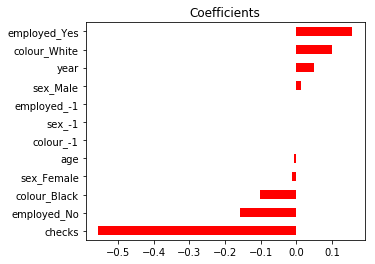

In [82]:
plt.figure(figsize = (5, 4))
plt.title('Coefficients')
coefficients = pipeline.named_steps['logisticregression'].coef_[0]
feature_names = pipeline.named_steps['onehotencoder'].transform(X_train).columns
pd.Series(coefficients, feature_names).sort_values().plot.barh(color = 'r')

In [85]:
# Fit model
class_weight = None

model = LogisticRegression(solver='lbfgs')
model.fit(X_train_numeric, y_train)

# Evaluate model
y_pred = model.predict(X_test_numeric)
print(classification_report(y_val, y_pred))
print('accuracy', accuracy_score(y_test, y_pred))

# Visualize decision regions
plt.figure(figsize = (5, 4))
plot_decision_regions(X_val, y_val, model, legend = 0)

              precision    recall  f1-score   support

       False       0.00      0.00      0.00        96
        True       0.82      1.00      0.90       427

   micro avg       0.82      0.82      0.82       523
   macro avg       0.41      0.50      0.45       523
weighted avg       0.67      0.82      0.73       523

accuracy 0.847036328871893


/Users/danielleromanoff/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/danielleromanoff/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/danielleromanoff/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ValueError: X must be a NumPy array. Found <class 'pandas.core.frame.DataFrame'>

<Figure size 360x288 with 0 Axes>

In [89]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[  4  76]
 [  5 438]]


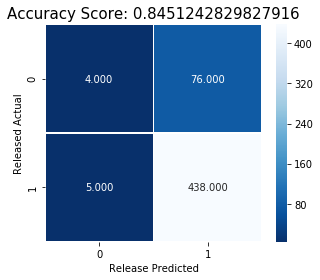

In [94]:
plt.figure(figsize=(5,  4))
sns.heatmap(cm, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = 'Blues_r');
plt.ylabel('Released Actual');
plt.xlabel('Release Predicted');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size = 15);

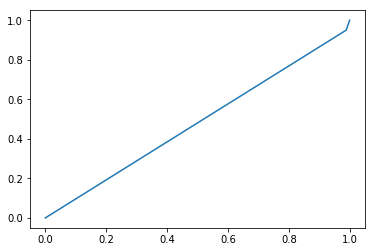

AUC: 0.4806433408577878


In [111]:
#ROC AUC plot
# This is the ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label = 0)

# Print ROC curve
plt.plot(fpr,tpr)
plt.show() 

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)